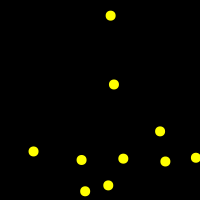

In [ ]:
import drawSvg as draw
import random 
import math
import numpy as np

#step 1:define variables
window_x=200#define the width of drawing window
window_y=200#define the height of drawing window
num=10 #number of balls
r=5 #define the radius
timestep=1 #define timestep
X=np.random.uniform(-100,100,num)#make a list for x
Y=np.random.uniform(-100,100,num)#make a list for y
Vx=np.random.uniform(-5,5,num)#make a list of Vx
Vy=np.random.uniform(-5,5,num)#make a list for vy

#step 2: define functions
def update_position(i):
    
    if X[i]+r>window_x/2:
        X[i]=window_x/2-r #update x-coordinate
        Vx[i]= -Vx[i] #negate velocity
        
    if X[i]-r<-(window_x/2):
        X[i]=-(window_x/2)+r #update x-coordinate
        Vx[i]= -Vx[i] #negate velocity
        
    if Y[i]+r>window_y/2:
        Y[i]=window_y/2-r #update y-coordinate
        Vy[i]= -Vy[i] #negate velocity
        
    if Y[i]-r<-(window_y/2):
        Y[i]=-(window_y/2)+r #update y-coordinate
        Vy[i]= -Vy[i] #negate velocity
        
    X[i] = X[i] + timestep * (Vx[i]) #the core formula of x-coordinate
    Y[i] = Y[i] + timestep * (Vy[i]) #the core formula of y-coordinate
    
    for j in range(0,num):
        if j!=i and math.sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2)<=2*r:
            Vx[i]=-Vx[i] #negate velocity of i
            Vy[i]=-Vy[i] #negate velocity of i
            
            X[i] = X[i] + 1.2*timestep * Vx[i] #reupdate x-coordinate of i
            Y[i] = Y[i] + 1.2*timestep * Vy[i] #reupdate y-coordinate of i
            X[j] = X[j] + 1.2*timestep * Vx[j] #reupdate x-coordinate of j
            Y[j] = Y[j] + 1.2*timestep * Vy[j] #reupdate y-coordinate of j

def draw_ball(i):
    D.append(draw.Circle(X[i],Y[i],r,fill='yellow')) #draw the ball

def draw_frame():
    for i in range(0,num):
        update_position(i) #execute update_position for i
        draw_ball(i) #execute draw_ball for i
    return D

#step 3: draw animation
with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
    while( True ):
        D = draw.Drawing(window_x, window_y, origin='center' ) # erase canvas
        D.append(draw.Rectangle(-window_x/2,-window_y/2,window_x,window_y, fill='black'))
        anim.draw_frame()    
    
